# Sparkify Project - Features exploration on a small dataset

This workspace contains the code that allows us to explore the data and determine which feature is meaningfull to distinguish users that churns. <br>
We work on a small subset of the data. We do not need to do this study on a cluster. That is why pandas is prefered to spark in this notebook. <br>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Load Dataset

In [2]:
# Load data
path = "mini_sparkify_event_data.json"
df = pd.read_json(path, lines=True)

In [3]:
df.head()

,ts,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,registration,gender,artist,song,length
0,1538352117000,30,29,NextSong,Logged In,PUT,200,paid,50,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Martha Tilston,Rockpools,277.89016
1,1538352180000,9,8,NextSong,Logged In,PUT,200,free,79,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Five Iron Frenzy,Canada,236.09424
2,1538352394000,30,29,NextSong,Logged In,PUT,200,paid,51,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Adam Lambert,Time For Miracles,282.82730
3,1538352416000,9,8,NextSong,Logged In,PUT,200,free,80,"Boston-Cambridge-Newton, MA-NH","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,1.538332e+12,M,Enigma,Knocking On Forbidden Doors,262.71302
4,1538352676000,30,29,NextSong,Logged In,PUT,200,paid,52,"Bakersfield, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,1.538173e+12,M,Daft Punk,Harder Better Faster Stronger,223.60771


In [4]:
# get the columns name
df.columns

Index(['ts', 'userId', 'sessionId', 'page', 'auth', 'method', 'status',
       'level', 'itemInSession', 'location', 'userAgent', 'lastName',
       'firstName', 'registration', 'gender', 'artist', 'song', 'length'],
      dtype='object')

The dataset contain the following columns :
- artist : the name of the artist of the song played (if any)
- auth : authentication of the user
- firstName : First name of the user
- gender : The gender of the user
- itemInsession : number of interaction of the user during the current session
- lastName : Last name of the user
- length : Duration of the song played(if any)
- level : Subscription level of the user (paid or free)
- location : location of the user
- method : request type (PUT or GET)
- page : Interaction type of the user
- registration : Timestamp of the registration the user
- sessionId : ID of the current session of the user
- song : Name of the song played by the user (if any)
- status : Status code (307, 404, or 200)
- ts : Timestamp of the event
- userAgent : Environment system information of the user
- userId : Identification number of the user

# 2. Data Cleaning

In [5]:
# missing values in the dataset
df[df.isnull()==True].count()

ts               0
userId           0
sessionId        0
page             0
auth             0
method           0
status           0
level            0
itemInSession    0
location         0
userAgent        0
lastName         0
firstName        0
registration     0
gender           0
artist           0
song             0
length           0
dtype: int64

There is no missing values in the dataset

In [6]:
# Cleaning of the userId column

# Check the userIds
print("users IDs", np.sort(df["userId"].unique()))
print("")

# interaction of the '' user with the application
print("Interaction of the empty user Id ", df[df["userId"]==""]["page"].unique())
print("")
# name of the user ""
print("name of the empty user Id", df[df["userId"]==""]["firstName"].unique(), df[df["userId"]==""]["lastName"].unique())
print("")

# This userId does not seem to correspond to the activity of an actual user. 
# We decide to suppress all the rows corresponding to this userId.
df = df[df["userId"] != ""]

users IDs ['' '10' '100' '100001' '100002' '100003' '100004' '100005' '100006'
 '100007' '100008' '100009' '100010' '100011' '100012' '100013' '100014'
 '100015' '100016' '100017' '100018' '100019' '100021' '100022' '100023'
 '100024' '100025' '101' '102' '103' '104' '105' '106' '107' '108' '109'
 '11' '110' '111' '112' '113' '114' '115' '116' '117' '118' '119' '12'
 '120' '121' '122' '123' '124' '125' '126' '127' '128' '129' '13' '131'
 '132' '133' '134' '135' '136' '137' '138' '139' '14' '140' '141' '142'
 '143' '144' '145' '146' '147' '148' '149' '15' '150' '151' '152' '153'
 '154' '155' '156' '16' '17' '18' '19' '2' '20' '200001' '200002' '200003'
 '200004' '200005' '200006' '200007' '200008' '200009' '200010' '200011'
 '200012' '200014' '200015' '200016' '200017' '200018' '200019' '200020'
 '200021' '200022' '200023' '200024' '200025' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '3' '30' '300001' '300002' '300003' '300004' '300005'
 '300006' '300007' '300008' '300009' '300010' '3

In [7]:
# we transform the unix epoch timestamps corresponding to event and registration into human readable date
df['ts'] = pd.to_datetime(df['ts']*1000000)
df['registration'] = pd.to_datetime(df['registration']*1000000)

# 3. Data exploration

In [8]:
# number of lines and rows of the dataset
df.shape

(278154, 18)

In [9]:
# number of rows in the dataframe
df.shape

(278154, 18)

In [10]:
# number of distinct IDs in the dataframe
len(df["userId"].unique())

225

In [11]:
# number of songs in the database
n_songs = len(df["song"].unique())
print("There are {} songs registered.".format(n_songs))

There are 58481 songs registered.


All the pages consulted by users can be seen in the "page" column. It is important to have a look at this column in order to get a better idea of the interaction between users and the application.

In [12]:
# pages name consulted by users and counts
df_page = df[["page", "userId"]].groupby("page").count().sort_values(by="userId", ascending=False)
df_page.columns = ["count"]
df_page

,count
page,
NextSong,228108
Thumbs Up,12551
Home,10082
Add to Playlist,6526
Add Friend,4277
Roll Advert,3933
Logout,3226
Thumbs Down,2546
Downgrade,2055


The pages the most consulted by users is nextSong which make sense for an application dedicated to music steaming. We notice that the less consulted page by users is "Cancellation Confirmation" which correspond to a churn event. <br> We can split the pages on 3 categories : 
- related to music
- related to user subscription
- other

In [13]:
# pages related to music event
df_page.loc[["NextSong", "Thumbs Up", "Thumbs Down", "Add to Playlist"]]

,count
page,
NextSong,228108
Thumbs Up,12551
Thumbs Down,2546
Add to Playlist,6526


In [14]:
# pages related to upgrade / downgrade / cancel events
df_page.loc[["Submit Downgrade", "Downgrade", "Submit Upgrade", "Upgrade", "Cancel","Cancellation Confirmation"]]

,count
page,
Submit Downgrade,63
Downgrade,2055
Submit Upgrade,159
Upgrade,499
Cancel,52
Cancellation Confirmation,52


In [15]:
# page related to account use
df_page.loc[["Home", "Add Friend", "Roll Advert", "Logout", "Settings", "Save Settings", "Help", "About", "Error"]]

,count
page,
Home,10082
Add Friend,4277
Roll Advert,3933
Logout,3226
Settings,1514
Save Settings,310
Help,1454
About,495
Error,252


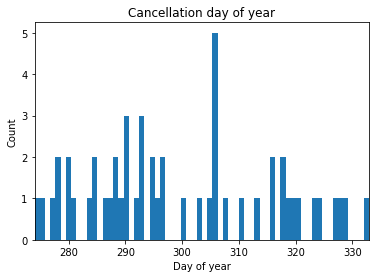

In [16]:
# date of cancellation
date_cancel = pd.DatetimeIndex(df[df["page"]=="Cancellation Confirmation"]["ts"].values).dayofyear
plt.hist(date_cancel, bins = 64);
plt.xlim([min(date_cancel), max(date_cancel)])
plt.xlabel("Day of year");
plt.ylabel("Count");
plt.title("Cancellation day of year");

The cancellations do not occur at a certain time all together meaning that there is no global event that cause the cancellations. We now have to investigate the users who churned compared to the others to see what differences there are on their interaction with the application and their caracteristics.

# 3. Data preparation

In [17]:
# we convert the userId values to integers
df["userId"] = df["userId"].astype(int)

In [18]:
# In order to distinguish user that churned from those who did not, we need to define a churn value for each user. <br>
# In our case, it correspond to users that have seen the "Cancellation Confirmation" "page".
user_ids_churn = df[df["page"]=="Cancellation Confirmation"]["userId"].unique()
df["churn"] = df['userId'].apply(lambda x: 1 if x in user_ids_churn else 0)

In [19]:
# we define the users Id group that did not churn
user_ids = df["userId"].unique()
user_ids_no_churn = list(set(user_ids) - set(user_ids_churn))

# 4. Feature exploration

The purpose of this section is to test different feature and to compare the users who churn and those who don't.

### First use after registration

In [20]:
# creation of a column "days since registration"
df["days_since_reg"] = df["ts"].dt.dayofyear - df["registration"].dt.dayofyear

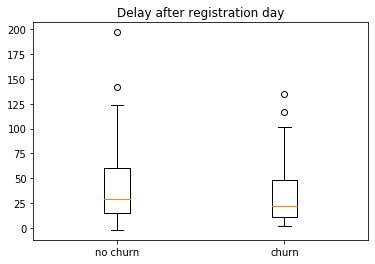

In [21]:
# we collect the first day of use after the registration day for the 2 groups
first_use_churn = []
first_use_no_churn = []
for user in user_ids:
    first_use = df[df["userId"]==user].groupby(["userId", "days_since_reg"])["page"].count().index[0][1]
    if user in user_ids_churn:
        first_use_churn.append(first_use)
    else:
         first_use_no_churn.append(first_use)

# plot
width = 0.35
x = [- width/2, width/2]

data = [first_use_no_churn, first_use_churn]
plt.boxplot(data, showfliers=True);
plt.title("Delay after registration day")
plt.xticks([1,2], ["no churn", "churn"]);

**On this boxplot, we don't see a major difference between the 2 groups. <br>
The first day of use after registration is not a good feature for our purpose.**

### Number of pages seen per week

In [22]:
df["ts_year"] = df["ts"].dt.year
df["ts_week"] = df["ts"].dt.week
df["ts_month"] = df["ts"].dt.month

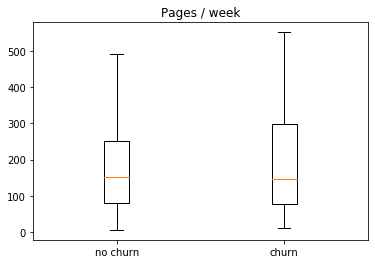

In [23]:
freq_churn = []
freq_no_churn = []
for user in user_ids:
    freq = df[df["userId"]==user].groupby(["userId", "ts_week"])["page"].count().values.mean()
    if user in user_ids_churn:
        freq_churn.append(freq)
    else:
         freq_no_churn.append(freq)

# plot
width = 0.35
x = [- width/2, width/2]
data = [freq_no_churn, freq_churn]
plt.boxplot(data, showfliers=False);
plt.title("Pages / week")
plt.xticks([1,2], ["no churn", "churn"]);

**On this boxplot, we don't see a major difference between the 2 groups. <br>
The Number of pages seen per week is not a good feature for our purpose.**

### Number of pages seen per day

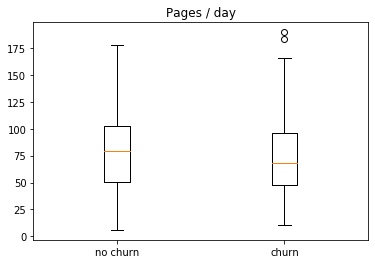

In [24]:
freq_churn = []
freq_no_churn = []
for user in user_ids:
    freq = df[df["userId"]==user].groupby(["userId", "days_since_reg"])["page"].count().values.mean()
    if user in user_ids_churn:
        freq_churn.append(freq)
    else:
         freq_no_churn.append(freq)

# plot
width = 0.35
x = [- width/2, width/2]
data = [freq_no_churn, freq_churn]
plt.boxplot(data, showfliers=True);
plt.title("Pages / day")
plt.xticks([1,2], ["no churn", "churn"]);

**On this boxplot, we don't see a major difference between the 2 groups. <br>
The number of pages seen per day is not a good feature for our purpose.**

### Days difference between successive connection

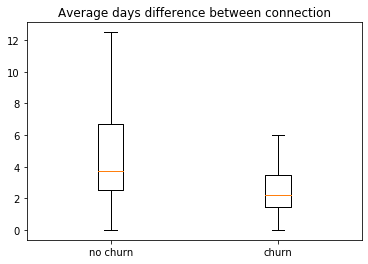

In [25]:
freq_churn = []
freq_no_churn = []
for user in user_ids:
    days = df[df["userId"]==user]["days_since_reg"].unique()
    if len(days) > 1:
        freq = np.mean(np.diff(days))
    else:
        # if there is only one connection then we set the mean difference to one
        freq = 0
    if user in user_ids_churn:
        freq_churn.append(freq)
    else:
         freq_no_churn.append(freq)

# plot
width = 0.35
x = [-width/2, width/2]
data = [freq_no_churn, freq_churn]
plt.boxplot(data, showfliers=False);
plt.title("Average days difference between connection")
plt.xticks([1, 2], ["no churn", "churn"]);

**On this boxplot, we don't see a major difference between the 2 groups. <br>
The average days difference between sessions is a good feature for our purpose.**

### Raw count of each page

Here, we have a look on the raw count of all the pages type for both groups and we compare them.

In [26]:
# we create dataframe with userId in the first column, a count of the named page in the second.
n_nextsong = pd.DataFrame(df[df["page"]=="NextSong"].groupby("userId")["page"].count().rename("n_nextsong"))
n_thumbs_up = df[df["page"]=="Thumbs Up"].groupby("userId")["page"].count().rename("n_thumbs_up")
n_home = df[df["page"]=="Home"].groupby("userId")["page"].count().rename("n_home")
n_add_to_playlist = df[df["page"]=="Add to Playlist"].groupby("userId")["page"].count().rename("n_add_to_playlist")
n_add_friends = df[df["page"]=="Add Friend"].groupby("userId")["page"].count().rename("n_add_friends")
n_roll_advert = df[df["page"]=="Roll Advert"].groupby("userId")["page"].count().rename("n_roll_advert")
n_logout = df[df["page"]=="Logout"].groupby("userId")["page"].count().rename("n_logout")
n_thumbs_down = df[df["page"]=="Thumbs Down"].groupby("userId")["page"].count().rename("n_thumbs_down")
n_downgrade = df[df["page"]=="Downgrade"].groupby("userId")["page"].count().rename("n_downgrade")
n_settings = df[df["page"]=="Settings"].groupby("userId")["page"].count().rename("n_settings")
n_help = df[df["page"]=="Help"].groupby("userId")["page"].count().rename("n_help")
n_upgrade = df[df["page"]=="Upgrade"].groupby("userId")["page"].count().rename("n_upgrade")
n_about = df[df["page"]=="About"].groupby("userId")["page"].count().rename("n_about")
n_save_settings = df[df["page"]=="Save Settings"].groupby("userId")["page"].count().rename("n_save_settings")
n_error = df[df["page"]=="Error"].groupby("userId")["page"].count().rename("n_error")
n_submit_upgrade = df[df["page"]=="Submit Upgrade"].groupby("userId")["page"].count().rename("n_submit_upgrade")
n_submit_downgrade = df[df["page"]=="Submit Downgrade"].groupby("userId")["page"].count().rename("n_submit_downgrade")
n_cancel = df[df["page"]=="Cancel"].groupby("userId")["page"].count().rename("n_cancel")
n_cancel_confirmation = df[df["page"]=="Cancellation Confirmation"].groupby("userId")["page"].count().rename("n_cancel_confirmation")

In [27]:
# we join the dataframe together with userId as reference column. We use outer join.
users_df = n_nextsong.join(n_thumbs_up, on="userId", how="outer")\
                     .join(n_home, on="userId", how="outer")\
                     .join(n_add_to_playlist, on="userId", how="outer")\
                     .join(n_add_friends, on="userId", how="outer")\
                     .join(n_roll_advert, on="userId", how="outer")\
                     .join(n_logout, on="userId", how="outer")\
                     .join(n_thumbs_down, on="userId", how="outer")\
                     .join(n_downgrade, on="userId", how="outer")\
                     .join(n_settings, on="userId", how="outer")\
                     .join(n_help, on="userId", how="outer")\
                     .join(n_upgrade, on="userId", how="outer")\
                     .join(n_about, on="userId", how="outer")\
                     .join(n_save_settings, on="userId", how="outer")\
                     .join(n_error, on="userId", how="outer")\
                     .join(n_submit_upgrade, on="userId", how="outer")\
                     .join(n_submit_downgrade, on="userId", how="outer")\
                     .join(n_cancel, on="userId", how="outer")\
                     .join(n_cancel_confirmation, on="userId", how="outer")

In [28]:
# The null values correspond to pages not seen by users. We can replace the null values by zeros.
users_df = users_df.fillna(0)

In [29]:
# we convert the gender categorical feature to integers (men : 1, women : 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="M" else 0)
gender = df[["userId", "gender"]].groupby("userId").max()

In [30]:
# we convert the level categorical feature to integers (paid : 1, free : 0)
df["level"] = df["level"].apply(lambda x: 1 if x=="paid" else 0)
level =  df[["userId", "level"]].groupby("userId").max()

In [31]:
# number of session dataframe
n_sessions = df[["userId", "sessionId"]].groupby("userId")["sessionId"].unique().apply(len).rename("n_sessions")

In [32]:
# we join the dataframes to the users_df
users_df = users_df.join(gender, on="userId", how="outer")\
                   .join(level, on="userId", how="outer")\
                   .join(n_sessions, on="userId", how="outer")

In [33]:
users_df.columns

Index(['n_nextsong', 'n_thumbs_up', 'n_home', 'n_add_to_playlist',
       'n_add_friends', 'n_roll_advert', 'n_logout', 'n_thumbs_down',
       'n_downgrade', 'n_settings', 'n_help', 'n_upgrade', 'n_about',
       'n_save_settings', 'n_error', 'n_submit_upgrade', 'n_submit_downgrade',
       'n_cancel', 'n_cancel_confirmation', 'gender', 'level', 'n_sessions'],
      dtype='object')

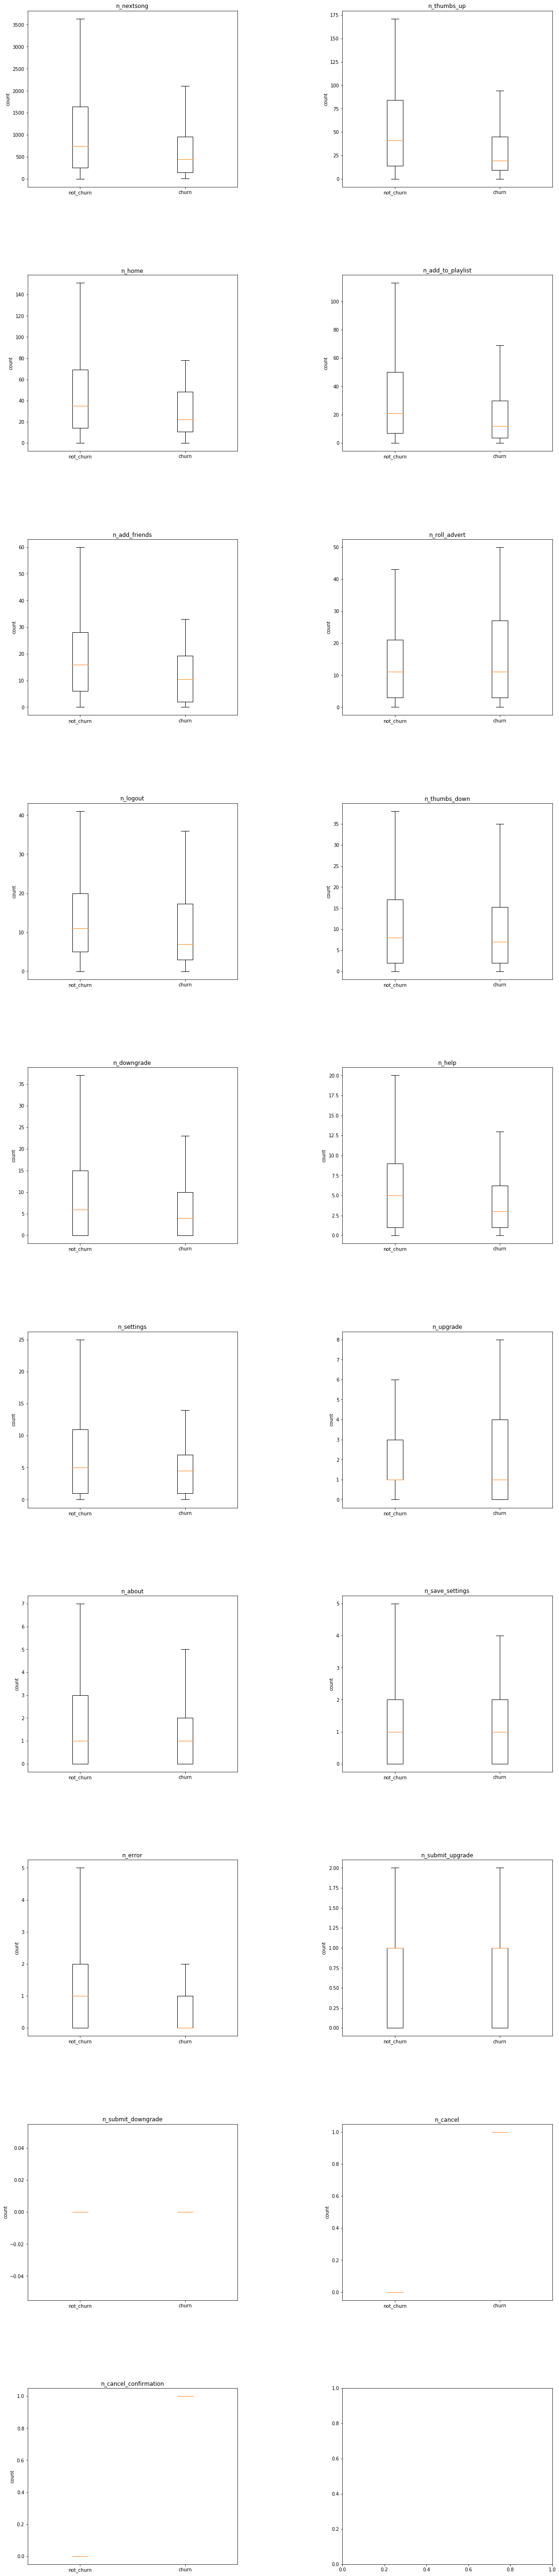

In [34]:
column_names = ["n_nextsong", "n_thumbs_up", "n_home", "n_add_to_playlist", "n_add_friends", "n_roll_advert", "n_logout", 
                "n_thumbs_down", "n_downgrade", "n_help", "n_settings", "n_upgrade", "n_about", "n_save_settings", "n_error", 
                "n_submit_upgrade", "n_submit_downgrade", "n_cancel", "n_cancel_confirmation"]

fig, axs = plt.subplots(10, 2, figsize=(20,100), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.5)
axs = axs.ravel()

width = 0.35

for n, col in enumerate(column_names):
    churn = users_df[users_df["n_cancel_confirmation"]==1][col].values
    no_churn = users_df[users_df["n_cancel_confirmation"]==0][col].values
    data = [no_churn, churn]
    axs[n].boxplot(data, showfliers=False);
    axs[n].set_xticklabels(["not_churn","churn"])
    axs[n].set_title(col);
    axs[n].set_ylabel("count");

**The users that did not churn have seen globally more pages that users that churn. <br>
Most of the plot are biased by this phenomena.<br>
We can't use most of this features without normalize by something that allow us to compare users that churn from those who don't. <br>
We only keep the number of friends of the users because we supose here that users can add their friends very quickly if they know other people that are using the app before their registration.**

### Pages / number of songs

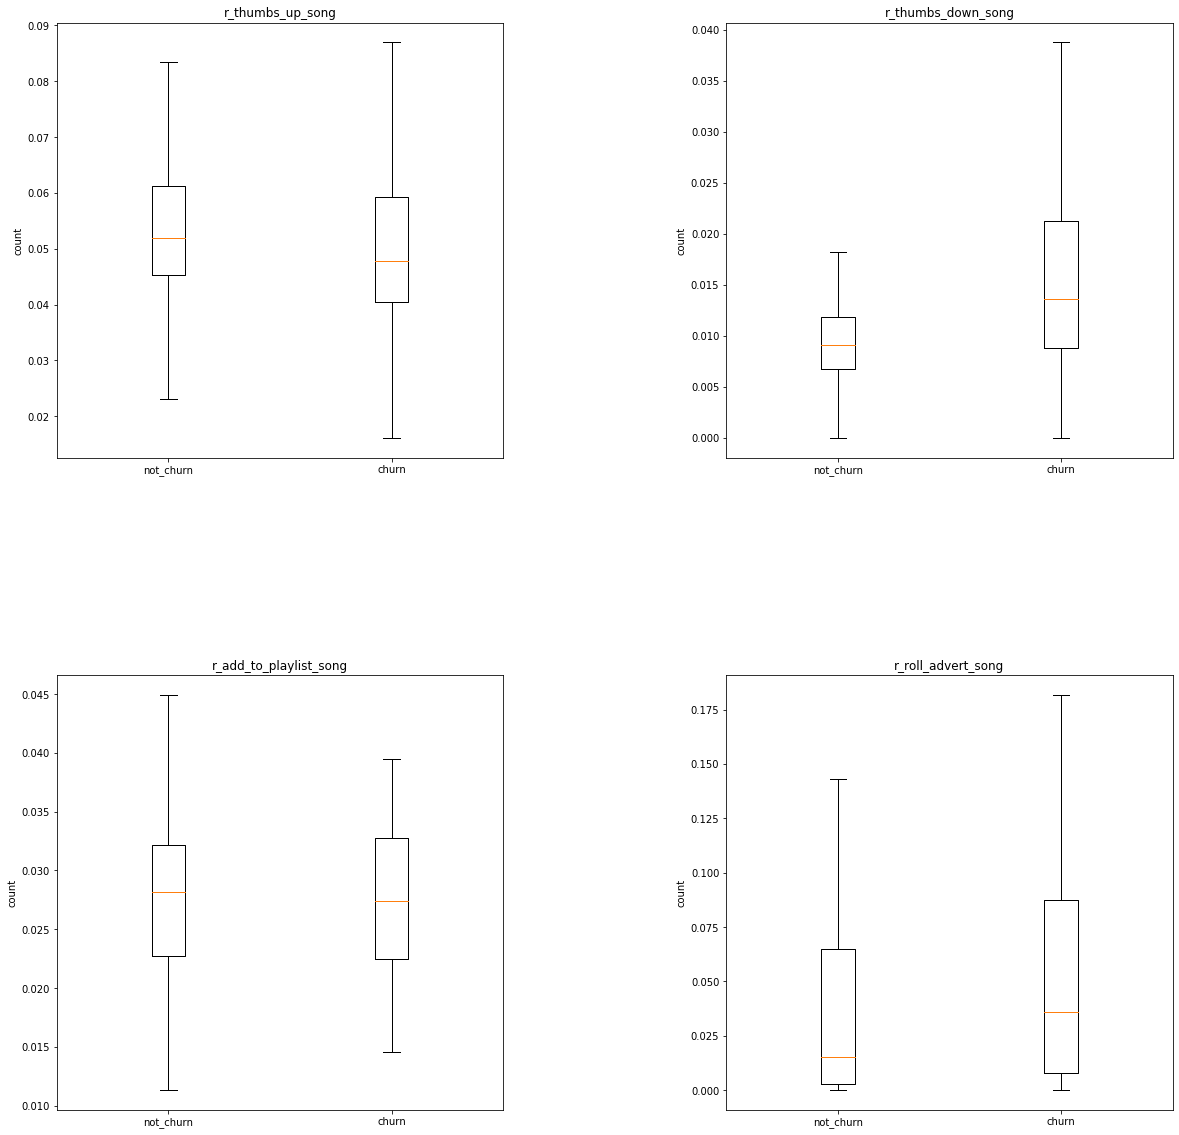

In [35]:
column_names = ["n_thumbs_up", "n_thumbs_down", "n_add_to_playlist", "n_roll_advert"]

for col in column_names:
    users_df["r"+col[1:]+"_song"] = users_df[col] / users_df["n_nextsong"]

fig, axs = plt.subplots(2, 2, figsize=(20,20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.5)
axs = axs.ravel()

width = 0.35

for n, col in enumerate(column_names):
    churn = users_df[users_df["n_cancel_confirmation"]==1]["r"+col[1:]+"_song"].values
    no_churn = users_df[users_df["n_cancel_confirmation"]==0]["r"+col[1:]+"_song"].values
    data = [no_churn, churn]
    axs[n].boxplot(data, showfliers=False);
    axs[n].set_xticklabels(["not_churn","churn"])
    axs[n].set_title("r"+col[1:]+"_song");
    axs[n].set_ylabel("count");

**The number of thumbs up and song added to playlist per song for the 2 groups is not that different. <br>
The number of thumbs down / song and the number of roll advertisement shows a significative difference between the 2 groups. We keep them as features.**

### Pages / number of sessions

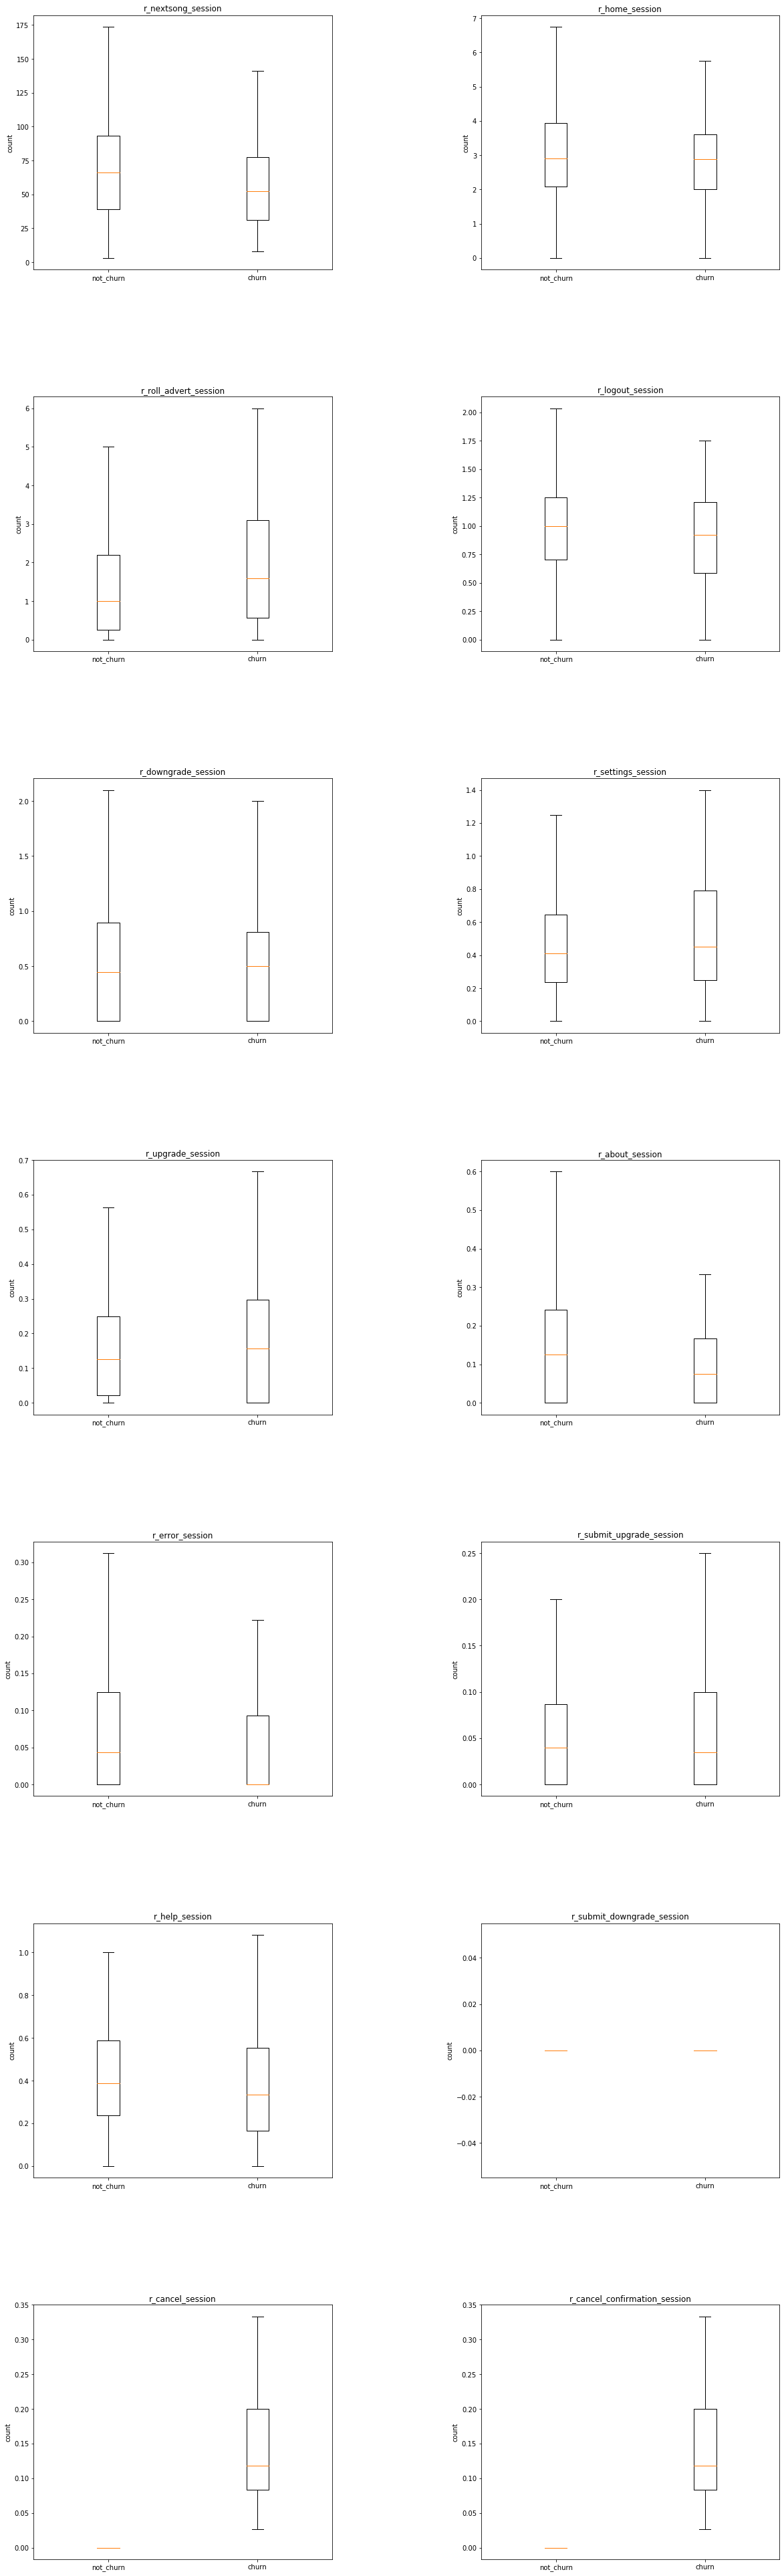

In [36]:
column_names = ["n_nextsong", "n_home", "n_roll_advert", "n_logout", "n_downgrade", 
                "n_settings", "n_upgrade", "n_about", "n_error", "n_submit_upgrade", 
                "n_help", "n_submit_downgrade", "n_cancel", "n_cancel_confirmation"]

for col in column_names:
    users_df["r"+col[1:]+"_session"] = users_df[col] / users_df["n_sessions"]

fig, axs = plt.subplots(7, 2, figsize=(20,70), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.5)
axs = axs.ravel()

width = 0.35

for n, col in enumerate(column_names):
    churn = users_df[users_df["n_cancel_confirmation"]==1]["r"+col[1:]+"_session"].values
    no_churn = users_df[users_df["n_cancel_confirmation"]==0]["r"+col[1:]+"_session"].values
    data = [no_churn, churn]
    axs[n].boxplot(data, showfliers=False);
    axs[n].set_xticklabels(["not_churn","churn"])
    axs[n].set_title("r"+col[1:]+"_session");
    axs[n].set_ylabel("count");

**Only the number of songs / session, the about page / session and error / session shows significative difference in their distribution. we keep them as feature.**

### Gender, Level

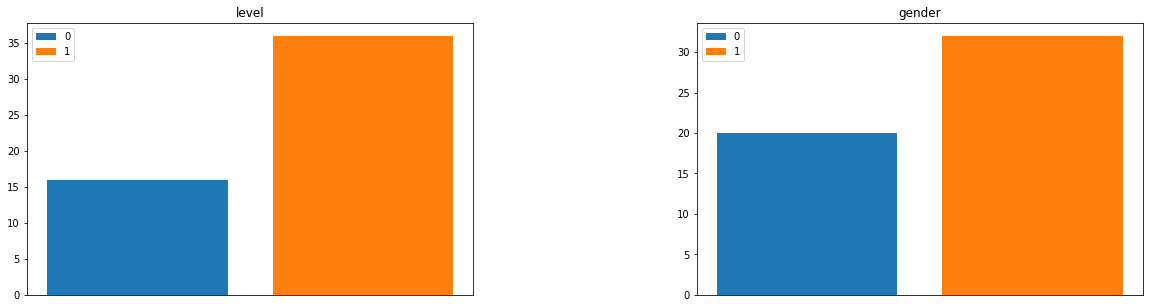

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(20,5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.5)
axs = axs.ravel()

width = 0.35
column_names = ["level", "gender"]
for n, col in enumerate(column_names):
    churn_0 = users_df[(users_df["n_cancel_confirmation"]==1) & (users_df[col]==0)]["n_cancel_confirmation"].count()
    churn_1 = users_df[(users_df["n_cancel_confirmation"]==1) & (users_df[col]==1)]["n_cancel_confirmation"].count()
    axs[n].bar(0, churn_0, label="0");
    axs[n].bar(1, churn_1, label="1");
    axs[n].set_xticks([])
    axs[n].set_xticklabels([])
    axs[n].legend()
    axs[n].set_title(col) 

**The gender and the level both show significative difference between the 2 groups. We keep them as features.**

# Conclusion

**The features that shows a bigger difference between churn and no churn group are :**
- **n_friends**
- **r_nextsong_session**
- **r_roll_advert_song**
- **r_about_session**
- **r_error_session**
- **r_thumbs_down_song**
- **gender**
- **level**
- **avg_diff_days**

**We will use them in the next notebook to build, train and evaluate a machine learning model that we can deploy on a cluster if we want to use a big dataset.**